# Evolution du prix de la baguette en métropole

Les données sont extraites de l'INSEE disponibles [ici](https://www.insee.fr/fr/statistiques/serie/000442423#Telechargement). Dans un premier temps on charge les données à l'aide de la librairie Pandas:

In [1]:
import pandas as pd

data = pd.read_csv("Data/valeurs_mensuelles.csv", skiprows=4, delimiter=";", names=["Date", "Price", "Label"], dtype={"Date": str, "Price": float, "Label": str})
nRow, nCol = data.shape
# On trie les données par date croissante
data.sort_values(by="Date", inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.head(), "\n...\n", data.tail())

      Date  Price Label
0  1992-01   2.12     A
1  1992-02   2.12     A
2  1992-03   2.13     A
3  1992-04   2.14     A
4  1992-05   2.14     A 
...
         Date  Price Label
355  2021-08   3.59     A
356  2021-09   3.59     A
357  2021-10   3.59     A
358  2021-11   3.60     A
359  2021-12   3.61     A


On peut regarder sur quelle plage s'étant les données:

In [2]:
print(data["Date"].min(), data["Date"].max())

1992-01 2021-12


La plage s'étant donc de janvier 1992 à décembre 2021. Nous procédons maintenant à un peu de calcul pour voir différents indicateurs sur le prix de la baguette sur l'ensemble de la période.

In [3]:
priceMin = data["Price"].min()
priceMAx = data["Price"].max()
priceMed = data["Price"].median()
priceStd = data["Price"].std(ddof=1)
print("Prix: minimum = {:.2f}€, maximum = {:.2f}€, median = {:.2f}€, std = {:.2f}€".format(priceMin, priceMAx, priceMed, priceStd))

Prix: minimum = 2.12€, maximum = 3.61€, median = 3.10€, std = 0.48€


On peut représenter maintenant l'évolution de ce prix en fonction du temps.

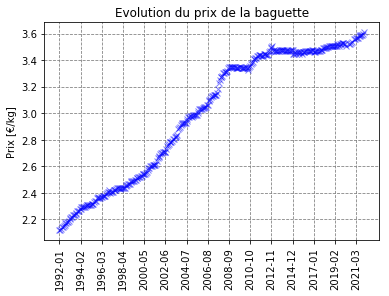

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(1,1)
ax.plot(data["Price"], linestyle="", marker="x", color="blue", alpha=0.5)

ax.set_xticks(data["Date"][0:nRow-1:25].index)
ax.set_xticklabels(data["Date"][0:nRow-1:25], rotation=90)

ax.set_title("Evolution du prix de la baguette")
#ax.set_xlabel("Date [yyyy-mm]")
ax.set_ylabel("Prix [€/kg]")

ax.grid(linestyle="--", linewidth=0.8, color="gray")

plt.show()

Nous constatons une évolution croissante du prix de vente de la baguette en métropole. Une analyse plus poussée pourrait être conduite afin de faire le lien avec d'autre facteurs tel l'inflation par exemple. 